# **Fuel Consumption Prediction: Data Analysis, ML Modeling & API Deployment with FastAPI**

## **Project Description**
This project focuses on analyzing vehicle fuel consumption, training a machine learning model to predict fuel usage, and deploying the model as an API using FastAPI. The dataset used contains vehicle specifications like engine size, cylinder count, coemissions, and fuel consumption of vehicle's manufactured in 2000.
The goal is to build a Linear Regression model that predicts fuel consumption based on given vehicle parameters and expose this model as a REST API.

## Import libraries:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Load the Data:

In [33]:
data  = pd.read_csv("FuelConsumption.csv")
data.head() # first five rows of data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


## Data Exploration

In [34]:
print(data.shape)
print(data.info())
data.describe()

(639, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB
None


,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


From the given data statistics we can say that average fuel consumption is nearly 14.7. 

In [35]:
data.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [36]:
data.drop(columns=["Year"], inplace=True)

We dropped the Year column because all vehicles in the dataset were manufactured in the same year (2000). Since it does not vary across the dataset, it does not contribute any meaningful information for predicting fuel consumption.

In [37]:
data.head()

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


## Data Cleaning:

In [38]:
# check missing values
data.isna().any()

MAKE                False
MODEL               False
VEHICLE CLASS       False
ENGINE SIZE         False
CYLINDERS           False
TRANSMISSION        False
FUEL                False
FUEL CONSUMPTION    False
COEMISSIONS         False
dtype: bool

There are no missing values in our data.

In [39]:
#check duplicate values
print(data.duplicated().sum())

1


In [40]:
data.drop_duplicates()

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...
634,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [41]:
data["ENGINE SIZE"].unique()

array([1.6, 3.2, 3.5, 1.8, 3. , 2.8, 2.7, 4.2, 2.5, 4.4, 5.4, 4.9, 3.1,
       3.8, 4.6, 5.7, 4.3, 4.8, 5.3, 6. , 2.2, 2.4, 5. , 3.4, 1. , 1.3,
       2. , 1.5, 3.3, 3.9, 4.7, 5.9, 5.2, 8. , 3.6, 5.5, 4. , 2.3, 1.9,
       2.9])

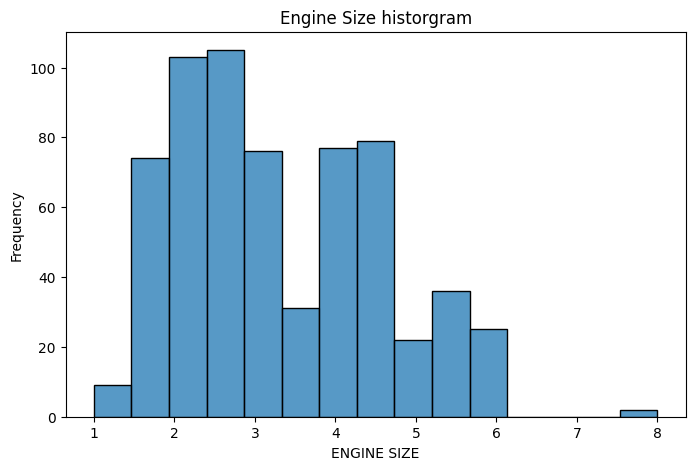

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="ENGINE SIZE")
plt.ylabel("Frequency")
plt.title("Engine Size historgram")
plt.show()

In [43]:
data["ENGINE SIZE"].describe()

count    639.000000
mean       3.265728
std        1.231012
min        1.000000
25%        2.200000
50%        3.000000
75%        4.300000
max        8.000000
Name: ENGINE SIZE, dtype: float64

We can see on average there are vehicles with low engine size nearly equal to 3.26.

## Transmission Type and Fuel Type Vs **Fuel Consumption**:

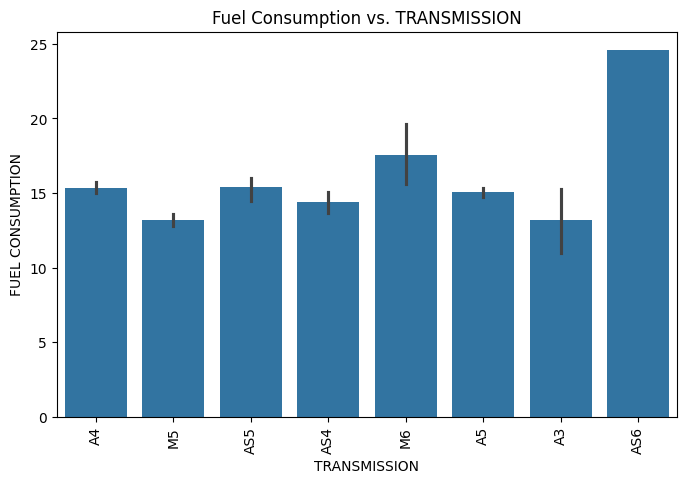

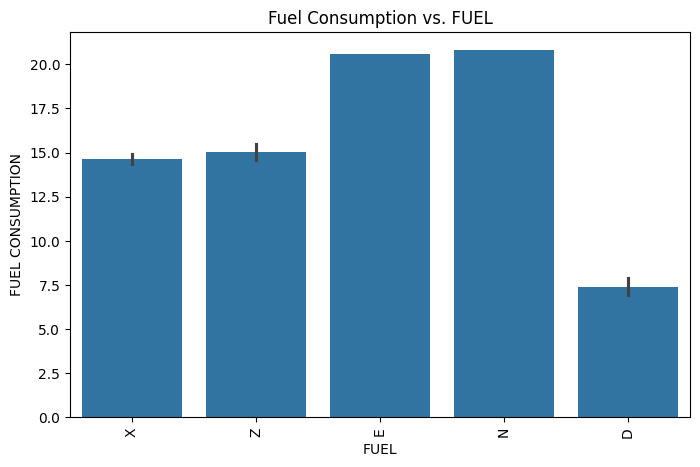

In [44]:
for var in ['TRANSMISSION', 'FUEL']:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=var, y="FUEL CONSUMPTION", data=data)
    plt.title(f'Fuel Consumption vs. {var}')
    plt.xticks(rotation=90)
    plt.show()

Fuel consumption is significantly higher with A56 transmission and lower with fuel type D, compared to other categories.

## Continuous Variables vs **Fuel Consumption**:

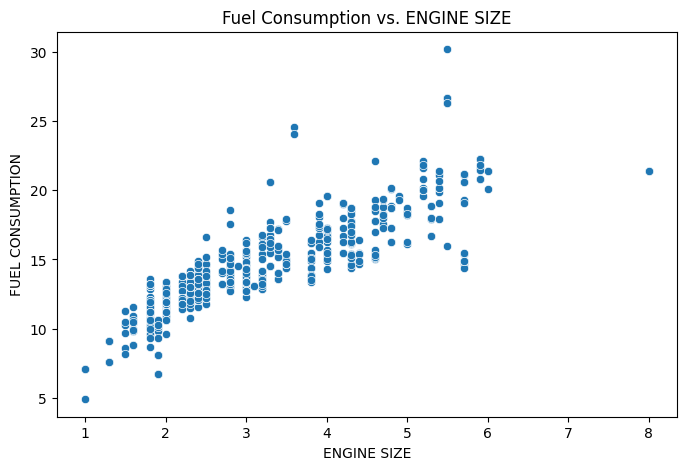

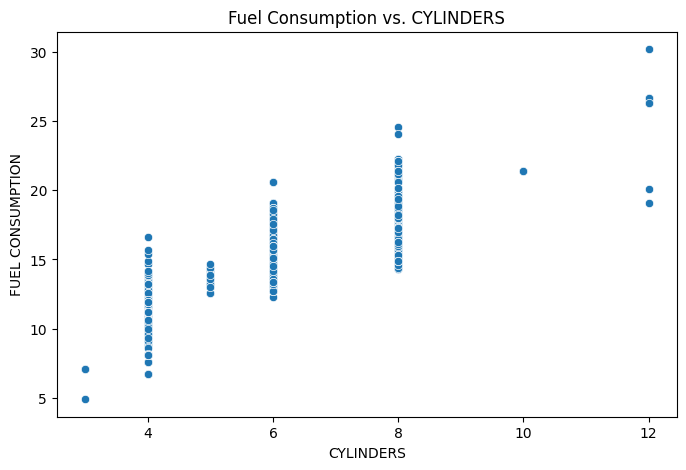

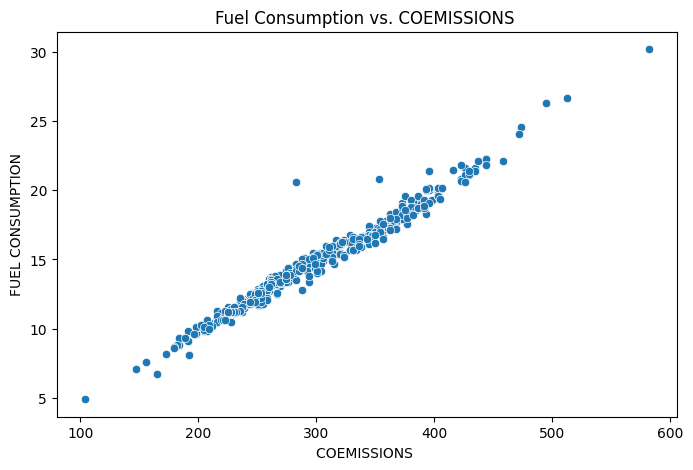

In [45]:
for var in ['ENGINE SIZE', 'CYLINDERS','COEMISSIONS ']:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=var, y="FUEL CONSUMPTION", data=data)
    plt.title(f'Fuel Consumption vs. {var}')
    plt.show()

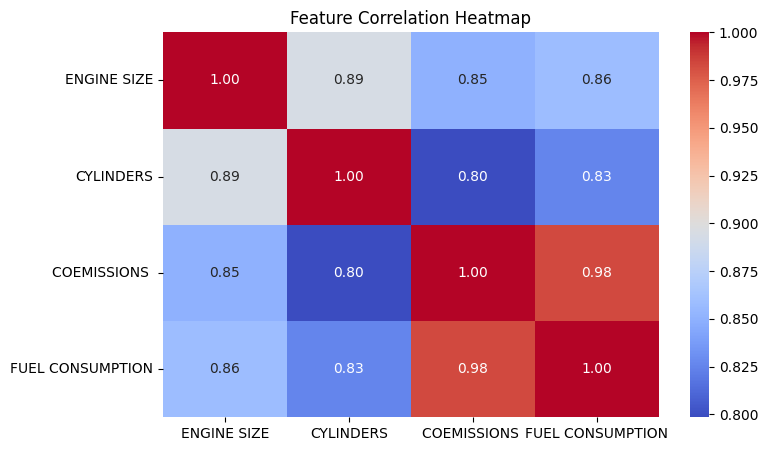

In [46]:
plt.figure(figsize=(8, 5))
sns.heatmap(data[['ENGINE SIZE', 'CYLINDERS','COEMISSIONS ','FUEL CONSUMPTION']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Engine size, number of cylinders, and CO2 emissions all show a strong positive correlation with fuel consumption, indicating that larger engines, more cylinders, and higher CO2 output are associated with greater fuel usage. Through the help of heatmap we can see that CO2 emissions have the strongest relation with fuel consumption indicating that vehicles that produce more CO2 consume more fuel.

## Feature Engineering:

In [47]:
data.columns


Index(['MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [48]:
updated_column_names = []
for i in data.columns:
    updated_column_names.append(i.capitalize())
    
updated_column_names

['Make',
 'Model',
 'Vehicle class',
 'Engine size',
 'Cylinders',
 'Transmission',
 'Fuel',
 'Fuel consumption',
 'Coemissions ']

In [49]:
data.columns = updated_column_names
data.columns

Index(['Make', 'Model', 'Vehicle class', 'Engine size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel consumption', 'Coemissions '],
      dtype='object')

## ML Modelling

### Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = data[["Engine size","Cylinders","Coemissions "]] # features matrix
y = data["Fuel consumption"] # label vector (target) 

In [52]:
X.head()

,Engine size,Cylinders,Coemissions
0,1.6,4,216
1,1.6,4,205
2,3.2,6,265
3,3.5,6,301
4,1.8,4,230


In [53]:
y.head()

0    10.5
1     9.8
2    13.7
3    15.0
4    11.4
Name: Fuel consumption, dtype: float64

In [54]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Training Linear Regression Model:

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [56]:
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
lr.coef_

array([0.00464786, 0.23399795, 0.04490739])

0.00464786 Engine size + 0.00464786 Cylinders + 0.04490739 CO2 Emissions = Fuel Consumption

In [58]:
y_predicted = lr.predict(X_test)

### Evaluating Model Performance

In [59]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test,y_predicted)
r2 = r2_score(y_test,y_predicted)
print(f"Mean absolute Error is: {mae: .2f}")
print(f"R² Score: {r2: .2f}")

Mean absolute Error is:  0.30
R² Score:  0.99


In [60]:
data["Fuel consumption"].describe()

count    639.000000
mean      14.713615
std        3.307044
min        4.900000
25%       12.500000
50%       14.400000
75%       16.600000
max       30.200000
Name: Fuel consumption, dtype: float64

The model performs exceptionally well, with a Mean Absolute Error (MAE) of 0.30, indicating highly accurate predictions, and an R² score of 0.99, showing that 99% of the variance in fuel consumption is explained by the model. The dataset's fuel consumption ranges from 4.9 to 30.2 L/100km, with most vehicles consuming between 12.5 and 16.6 L/100km. While the model's near-perfect fit suggests strong predictive power, it also raises concerns about overfitting. 

In [61]:
lr

LinearRegression()

In [62]:
import joblib
# Export model as pkl
joblib.dump(lr, "LinearModel.pkl")

['LinearModel.pkl']